In [41]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed.

In [74]:
data = pd.read_csv('D:\\Data Science\\0 - ASSIGNMENTS\\Assignment7-Clustering\\crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [75]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [77]:
data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [78]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [79]:
#Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [80]:
data_norm = norm_func(data.iloc[:,1:])
data_norm

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


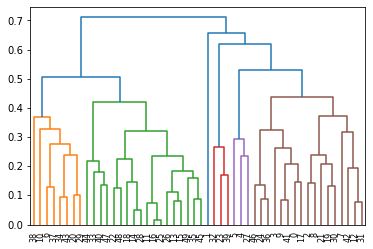

In [81]:
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

In [82]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [83]:
y_hc = hc.fit_predict(data_norm)
y_hc

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [84]:
data['h_clusterid']=pd.Series(y_hc)
data

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,1


In [86]:
data.iloc[:,1:].groupby(data.h_clusterid).mean()

,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,
0,269.533333,70.333333,30.60,0
1,148.040000,69.560000,19.46,1
2,79.400000,48.300000,11.61,2


In [ ]:
#There are 3 clusters formed

In [ ]:
#Kmeans

In [57]:
data.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


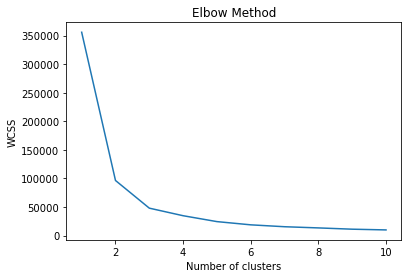

In [58]:
wcss=[]
for i in range(1,11):
    kMeans=KMeans(n_clusters=i,random_state=0)
    kMeans.fit(data)
    wcss.append(kMeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(data)

KMeans(n_clusters=4, random_state=42)

In [61]:
clusters_new.labels_

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0])

In [62]:
data['New_clusterid']=clusters_new.labels_

In [63]:
data.groupby('New_clusterid').agg(['mean']).reset_index()

,New_clusterid,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857,0.857143
1,1,5.590000,112.400000,65.600000,17.270000,1.300000
2,2,11.812500,272.562500,68.312500,28.375000,0.187500
3,3,2.950000,62.700000,53.900000,11.510000,1.700000


In [ ]:
#There are 4 clusters formed

In [ ]:
#DBSCAN

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [65]:
data.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid,New_clusterid
0,13.2,236,58,21.2,1,2
1,10.0,263,48,44.5,0,2
2,8.1,294,80,31.0,0,2
3,8.8,190,50,19.5,1,0
4,9.0,276,91,40.6,0,2


In [66]:
array=data.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ,   2. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ,   0. ],
       [  9. , 276. ,  91. ,  40.6,   0. ,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ,   0. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ,   1. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   2. ],
       [ 15.4, 335. ,  80. ,  31.9,   0. ,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   1. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   3. ],
       [  6. , 115. ,  66. ,  18. ,   1. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   2. ,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ,   2. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   3. ],
       [ 11.3, 300. ,  67. ,  2

In [67]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.14285714,
         0.50984993],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.28571429,
         0.50984993],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -1.28571429,
         0.50984993],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.14285714,
        -1.31104267],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -1.28571429,
         0.50984993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -1.28571429,
        -1.31104267],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.14285714,
        -0.40059637],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.14285714,
         0.50984993],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -1.28571429,
         0.50984993],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.14285714,
        -1.31104267],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [68]:
dbscan = DBSCAN(eps=2, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=6)

In [69]:
dbscan.labels_

array([ 0, -1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [71]:
data['clusters']=dbscan.labels_
data

,Murder,Assault,UrbanPop,Rape,h_clusterid,New_clusterid,clusters
0,13.2,236,58,21.2,1,2,0
1,10.0,263,48,44.5,0,2,-1
2,8.1,294,80,31.0,0,2,0
3,8.8,190,50,19.5,1,0,1
4,9.0,276,91,40.6,0,2,0
5,7.9,204,78,38.7,0,0,1
6,3.3,110,77,11.1,1,1,1
7,5.9,238,72,15.8,1,2,1
8,15.4,335,80,31.9,0,2,0
9,17.4,211,60,25.8,1,0,1


In [72]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,h_clusterid,New_clusterid
,,mean,mean,mean,mean,mean,mean
0,-1,10.000000,263.000000,48.000000,44.500000,0.000000,2.0
1,0,12.364286,275.714286,69.500000,28.121429,0.142857,2.0
2,1,5.894286,126.142857,64.457143,17.811429,1.228571,1.2


In [ ]:
#There are 3 clusters formed